In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [0]:
data = pd.read_csv("credit_card_clustering.csv")

In [105]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

### How many rows/columns are there?

In [106]:
data.shape

(8950, 18)

### How many customers are there?

In [107]:
data['CUST_ID'].nunique()

8950

This means, we have 8950 unique customer IDs

### How many of each Tenure are there?

In [108]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

Most (85%) of the customers have tenure of 12.

Remove NaN

In [0]:
data=data.fillna(0)

### How does the credit limit distribution of our customers look like?

Descriptive Statistics

In [110]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      4493.947277
std       3638.922543
min          0.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64



```
# This is formatted as code
```

The Credit Limit ranges from 50 to 30000 with an average (median) annual income is 3000.

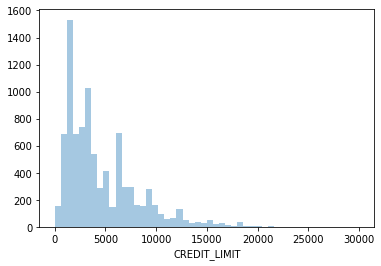

In [111]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

### How does the purchase distribution look like?

In [112]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

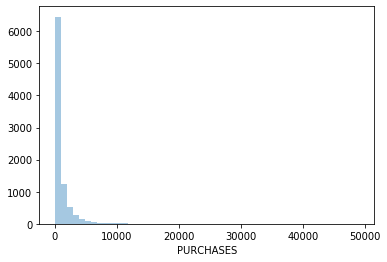

In [113]:
sns.distplot(data['PURCHASES'], kde=False)

### How does the prc payment distribution look like?

In [114]:
data['TENURE'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
10%        10.000000
20%        12.000000
30%        12.000000
40%        12.000000
50%        12.000000
60%        12.000000
70%        12.000000
80%        12.000000
90%        12.000000
max        12.000000
Name: TENURE, dtype: float64

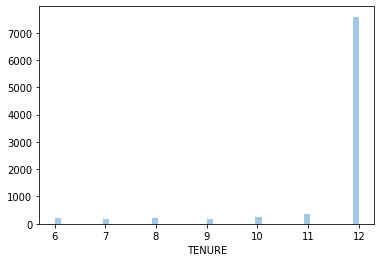

In [115]:
sns.distplot(data['TENURE'], kde=False)

In [116]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

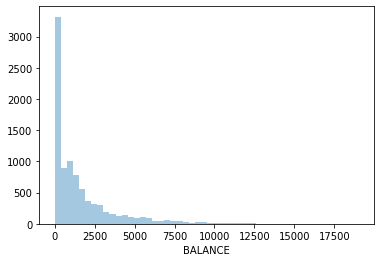

In [117]:
sns.distplot(data['BALANCE'], kde=False)

Purchases and Credit limit are skewed to the left.

# Clustering

In [0]:
from sklearn.cluster import KMeans

In [138]:
# Get features we need
features = ['PURCHASES','BALANCE','CREDIT_LIMIT']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,PURCHASES,BALANCE,CREDIT_LIMIT
0,95.40,40.900749,1000.0
1,0.00,3202.467416,7000.0
2,773.17,2495.148862,7500.0
3,1499.00,1666.670542,7500.0
4,16.00,817.714335,1200.0


### Choosing Optimal *k*

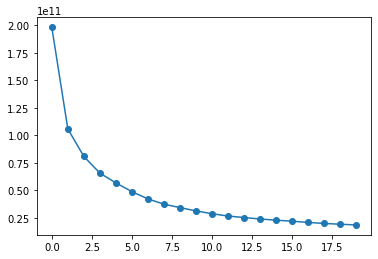

In [139]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=3*.


In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=5, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [141]:
new_data.head()

,PURCHASES,BALANCE,CREDIT_LIMIT,labels
0,95.40,40.900749,1000.0,1
1,0.00,3202.467416,7000.0,3
2,773.17,2495.148862,7500.0,3
3,1499.00,1666.670542,7500.0,3
4,16.00,817.714335,1200.0,1


### Plot Centers and labels

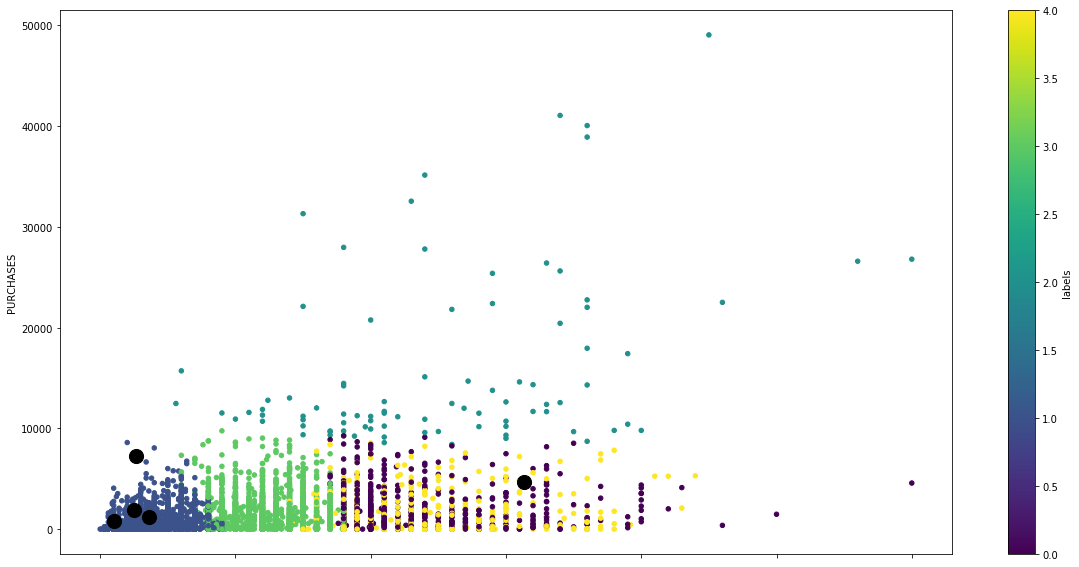

In [142]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='CREDIT_LIMIT', 
                      y='PURCHASES', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Deep Dive to each cluster

In [143]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,PURCHASES,BALANCE,CREDIT_LIMIT,labels
count,581.000000,581.000000,581.000000,581.0
mean,1814.171377,1156.244344,11670.654045,0.0
std,2017.613692,1331.270592,2856.763647,0.0
min,0.000000,0.000000,8500.000000,0.0
25%,319.920000,123.089579,10000.000000,0.0
50%,1109.910000,447.941813,10500.000000,0.0
75%,2673.730000,2206.463745,13000.000000,0.0
max,9249.730000,4766.360515,30000.000000,0.0


###Cluster 0: Pa-safe

- High credit limit, mid purchases, low balance
- Di masyado macredit card, Nagbabayad agad. Just here for cashless transactions. Pwede pa entice with promos to buy high ticket items.


In [144]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,PURCHASES,BALANCE,CREDIT_LIMIT,labels
count,5253.000000,5253.000000,5253.000000,5253.0
mean,515.199056,775.483684,2093.801108,1.0
std,755.207898,780.523802,974.780905,0.0
min,0.000000,0.000000,0.000000,1.0
25%,2.000000,72.033516,1200.000000,1.0
50%,247.450000,542.051302,2000.000000,1.0
75%,662.400000,1250.394614,3000.000000,1.0
max,8591.310000,3572.844689,4500.000000,1.0


Cluster 1: Tipid
- low purchases, low balance,low credit limit
- Newbie sa credit card, Takot sa utang, di rin masyado naeengganyo with the low credit limit, Pwede pa entice with promos to entice credit card activity.

In [145]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,PURCHASES,BALANCE,CREDIT_LIMIT,labels
count,89.000000,89.000000,89.000000,89.0
mean,15684.689663,4645.234124,12615.168539,2.0
std,8549.862473,3809.247335,5151.800240,0.0
min,8403.170000,348.342172,2800.000000,2.0
25%,10221.350000,1917.441126,9000.000000,2.0
50%,11681.640000,3123.339488,12000.000000,2.0
75%,17945.000000,6372.182817,16500.000000,2.0
max,49039.570000,19043.138560,30000.000000,2.0


Cluster 2: Alta
- High Purchases, High Credit Limit, Low Balance
- Mayaman, accomplished, madaming pera, nagsswipe ng di nag-iisip kasi afford naman niya.
- Pwede pa entice to have more credit card activity by increasing credit card limit. 

In [146]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,PURCHASES,BALANCE,CREDIT_LIMIT,labels
count,2464.000000,2464.000000,2464.000000,2464.0
mean,1247.773502,1921.575173,6101.984947,3.0
std,1573.423799,1734.139542,1293.783505,0.0
min,0.000000,0.000000,3000.000000,3.0
25%,93.240000,252.546989,5000.000000,3.0
50%,673.700000,1563.547288,6000.000000,3.0
75%,1815.185000,3258.988388,7000.000000,3.0
max,9751.900000,6832.111113,9000.000000,3.0


Cluster 3: Getting There.
- Mid Purchases, Mid Balance, Mid Credit Limit
- Getting there. Akyat pa more sa corporate ladder. Give them some time to grow.

In [149]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,PURCHASES,BALANCE,CREDIT_LIMIT,labels
count,563.000000,563.000000,563.000000,563.0
mean,1328.344156,7297.458065,11160.568384,4.0
std,1859.675652,2245.113076,2943.603844,0.0
min,0.000000,4007.610043,7000.000000,4.0
25%,0.000000,5724.426508,9000.000000,4.0
50%,410.240000,6886.213231,10500.000000,4.0
75%,1868.545000,8189.939207,12500.000000,4.0
max,8533.540000,18495.558550,22000.000000,4.0


Cluster 4: Trigger Happy, Walang Cash

- Low Purchases, High Balance, High Credit Limit
- Credit card on everyday transactions. But keeps a mid balance and di treats credit card balances as normal.

# Exercise: Add more features to X and see the results of the clusters.

# Explore [Agglomerative Clustering](https://colab.research.google.com/drive/1IcjI_ac1gNipwTZv3WYYzeQNx-arqRl7)


# Homework: Perform Clustering on [Credit Card Dataset](https://drive.google.com/file/d/1EtH7Y4Y8zVcUWj9y3EnU1i7Vx2By2_LI/view?usp=sharing).